# Importation des modules
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root

# Exercice 2
---

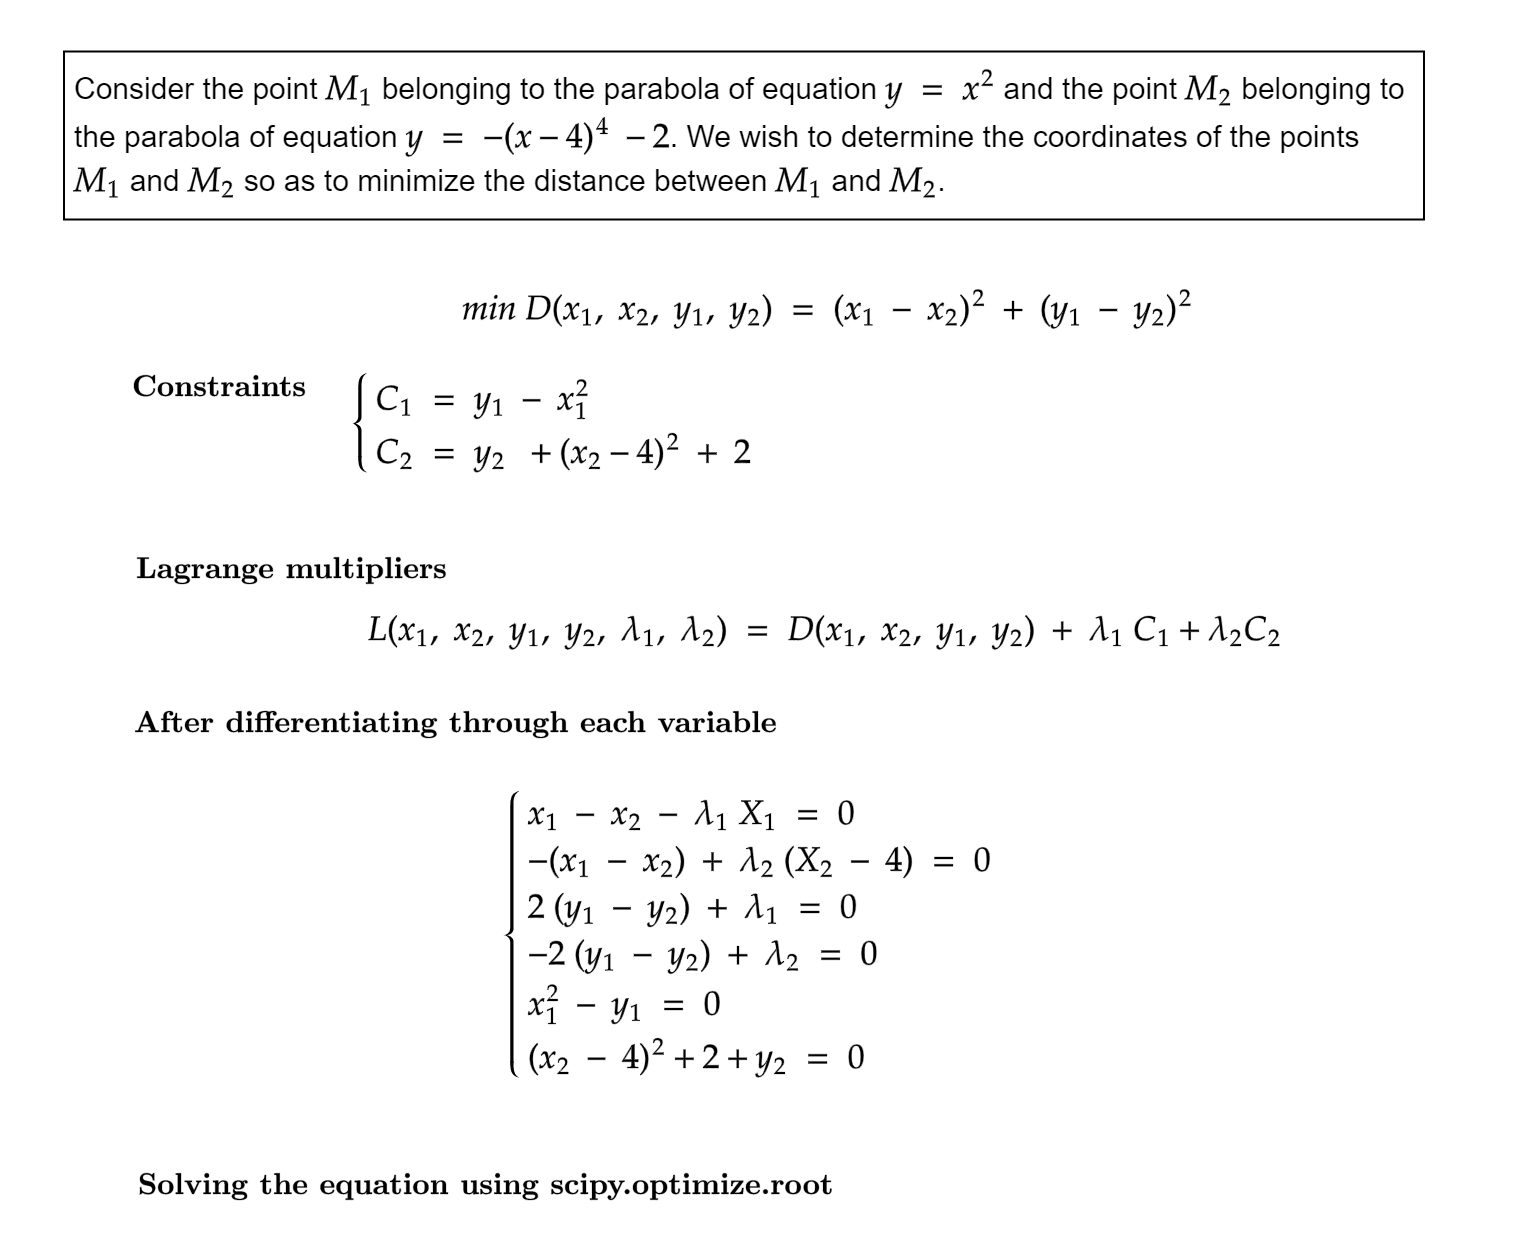

### Traçage des deux fonctions


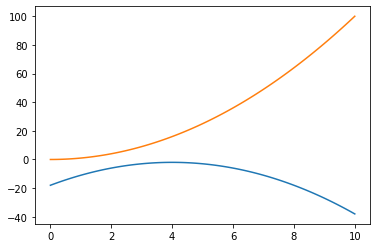

In [112]:
def f(x):
  return -(x-4)**2 - 2

X = np.linspace(0, 10, 100)

plt.plot(X, f(X))
plt.plot(X, X**2)
plt.show()

### Optimisation


In [116]:
def fuc(X):
  return [(X[0] - X[1]) - X[4] * X[0], 
          -(X[0] - X[1]) + X[5] * (X[1] - 4),
          2 * (X[2] - X[3]) + X[4],
          -2 *  (X[2] - X[3]) + X[5],
          X[0]**2 - X[2],
          X[3] + (X[1] - 4)**2 + 2]

solution = root(fuc, [2.5,2.5,0,0,0,0], method='hybr')

In [117]:
solution.x

array([ 0.55357378,  3.44642622,  0.30644393, -2.30644393, -5.22577573,
        5.22577573])

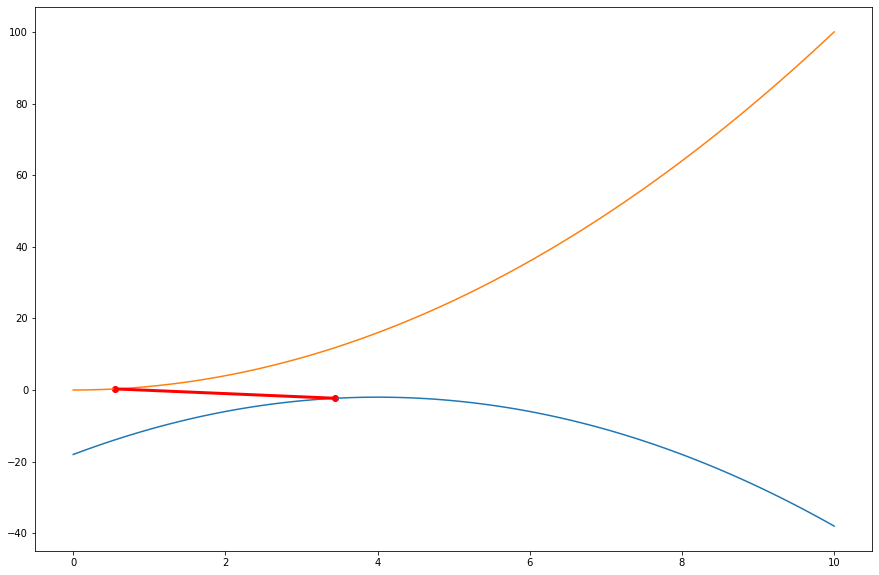

In [115]:
plt.figure(figsize=(15,10))
plt.plot(X, f(X))
plt.plot(X, X**2)
plt.scatter(solution.x[0], solution.x[2], c='r')
plt.scatter(solution.x[1], solution.x[3], c='r')
plt.plot([solution.x[0], solution.x[1]], [solution.x[2], solution.x[3]], c='r', lw = 3)


# Exercice 3 
---

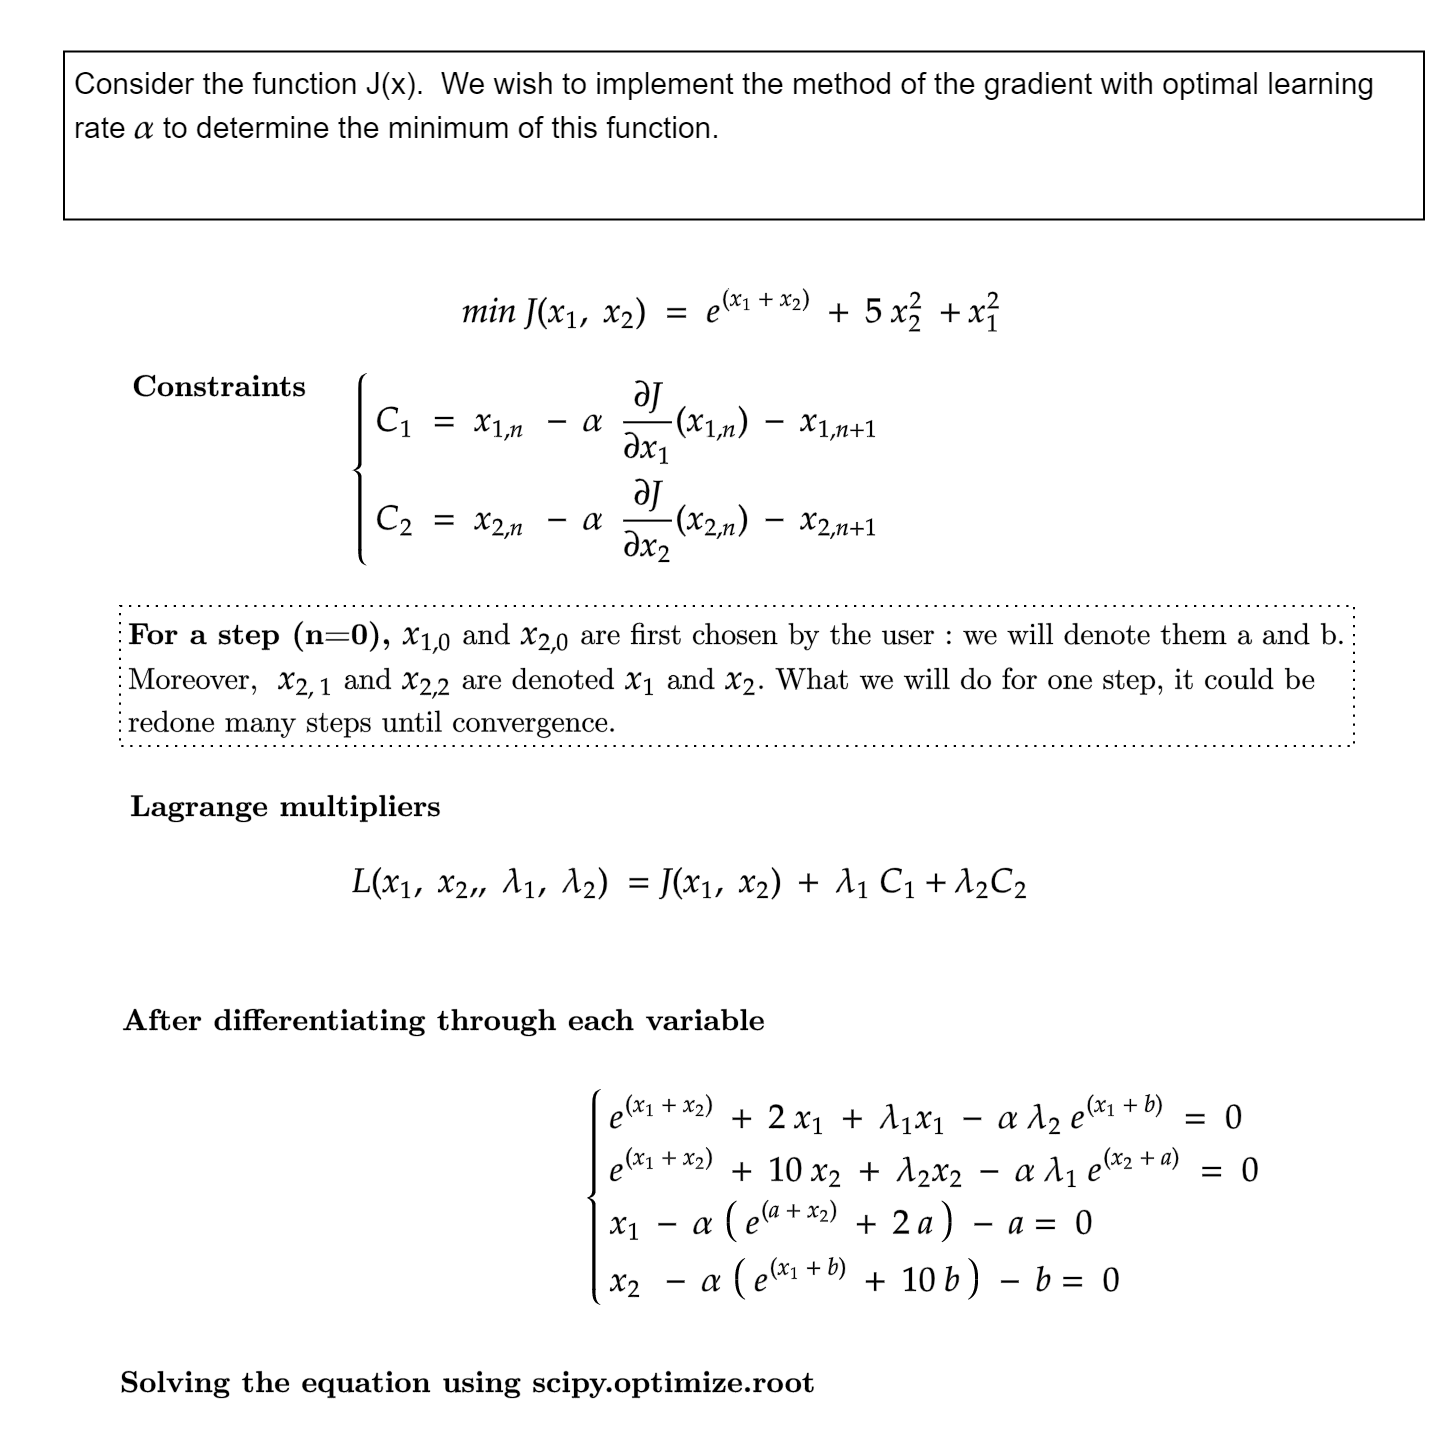

### Optimisation

In [104]:
def J(X, a, b, alpha):
  exp_x1_x2 = np.exp(X[0] + X[1])
  exp_x1_b = np.exp(X[0] + b)
  exp_x2_a = np.exp(X[1] + a)
  x1 = X[0]
  x2 = X[1]
  l1 = X[2]
  l2 = X[3]

  return [exp_x1_x2 + 2*x1 + l1 * x1 - alpha * l1 * exp_x1_b,
          exp_x1_x2 + 10*x2 + l2 * x2 - alpha * l1 * exp_x2_a,
          x1 - alpha * (exp_x2_a + 2 * a) - a,
          x2 - alpha * (exp_x1_b + 10 * b) - b]

sol = root(J, [8,8,0,0], method='hybr', args=(10,10, 0.0000001,))

In [105]:
sol.x

array([ 6.13028630e+00,  6.10597687e+00, -4.02777625e+04, -4.02857446e+04])

### Interprétation géometrique

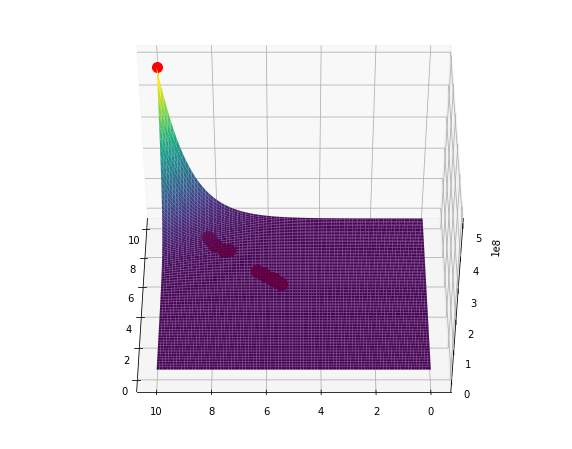

In [106]:
def j(x1, x2):
  return np.exp(x1+x2) + x1**2 + 5 * x2**2

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)

X1, X2 = np.meshgrid(x1, x2)


Z = j(X1, X2)

fig = plt.figure(figsize = (10,8))
ax = plt.axes(projection='3d')

ax.scatter(10,10, j(10,10), c = 'r', s = 100)
ax.scatter(sol.x[0], sol.x[1], j(sol.x[0], sol.x[1]), c = 'r', s = 100)

# 100 itérations pour l'optimisation et augmentation de la valeur de alpha à chaque itération pour accélerer la convergence.
for i in range(100):
  alpha = 0.0000001
  sol = root(J, [8,8,0,0], method='hybr', args=(sol.x[0], sol.x[1], alpha * 10))
  ax.scatter(sol.x[0], sol.x[1], j(sol.x[0], sol.x[1]), c = 'r', s = 150)
  alpha = alpha * 10

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(elev = 45, azim = 180)